<a href="https://colab.research.google.com/github/SevdaMO/MLDL2/blob/main/Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning and Deep Learning Projekt: Sleep Stage Classification
Gruppe 11: Corinna Bühler, Sevda Mollaoglu, Romy Schuster

## 1. Business Understanding

https://www.sciencedirect.com/science/article/pii/S0169260716308276


---

According to the AASM manual, each of the five stages is defined below and also illustrated in Fig. 1:

- W: Awake state (stage W) is characterized by alpha or faster frequency bands occupying more than 50% of the epoch, frequent eye movements and high EMG tone.

- N1: Stage N1 is scored when alpha occupies more than 50% of epoch while theta activity, slow rolling eye movements and vertex waves are evident.

- N2: Stage N2 is scored when sleep spindles or K-complexes (less than 3 min apart) are noted.

- N3: Stage N3 is characterized by delta activity detected in over 20% of the epoch length.

- REM: Upon sleep scoring an epoch is marked as REM when saw-tooth waves along with rapid eye movements as well as lowest EMG signals are observed through each epoch

## 2. Data Understanding

Die Rohdaten (wfdb files) beinhalten die Aufzeichnung über 8 stunden von insgesamt 36 Merkmalen für 113 Patienten.Die Sampling Frequenz beträgt 256 Hz. Diese Samplingrate gibt an, wie viele Datenpunkte pro Sekunde im Signal aufgenommen wurden.
https://physionet.org/content/cps-dataset-sleep/1.0.0/
Um die Komplexität einzugrenzen, fokussiert sich diese Projetarbeit auf den EEG Kanal C3:A2.

In [ ]:
pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.1 EEG Kanal 2 (C3:A2) und die ersten zwei Stunden extrahieren
Es werden zunächst nur die Aufzeichnungen von einem Patienten betrachtet. Für den Patienten zWtiCjFSxBFRmU3DklC4UMFKFHCOXJgS wird aus dem Datensatz der EEG Kanal C3:A2 extrahiert. Um die Komplexität weiter einzuschrnken wird zunächst nur der Zeitraum über die ersten 2 Stunden betrachtet.



Romys Pfad zur Datei: '/content/drive/MyDrive/zWtiCjFSxBFRmU3DklC4UMFKFHCOXJgS'

Samplingrate (Hz): 256
Number of signals: 36
Signal names: ['F4:A1', 'C3:A2', 'C4:A1', 'O2:A1', 'EOGl:A1', 'EOGr:A1', 'EMG+', 'EMG', 'Druck Snore', 'Schnarc', 'Druck Flow', 'Flow Th', 'RIP.Thrx', 'RIP.Abdom', 'PLMl', 'PLMr', 'Pulse', 'ECG 2', 'SPO2', 'Pos.', 'EOGl', 'EOGr', 'C3', 'C4', 'A1', 'A2', 'EMG-', 'Akku', 'EOGl:A2', 'EOGr:A2', 'Pleth', 'O2', 'Summe RIPs', 'Licht', 'F4', 'Beweg.']
Signal Data Shape (for 2 hours): (1843200,)


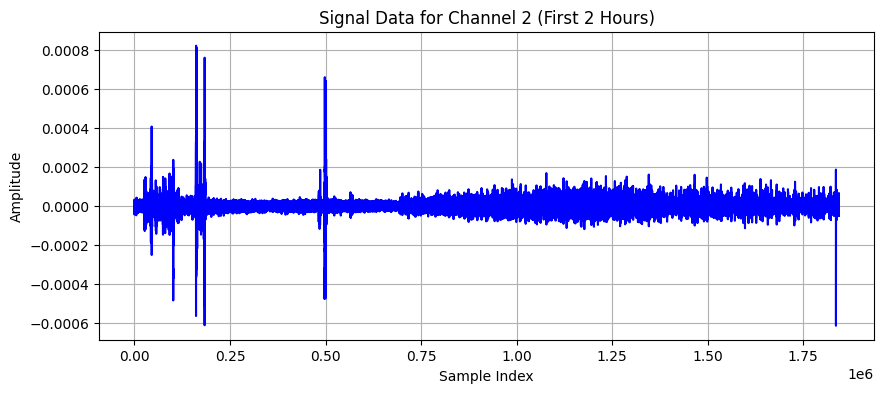

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Datei einlesen
record = wfdb.rdrecord('/content/drive/MyDrive/zWtiCjFSxBFRmU3DklC4UMFKFHCOXJgS')
sampling_rate = record.fs
print("Samplingrate (Hz):", sampling_rate)

# Überprüfen, wie viele Kanäle der Record hat
print("Number of signals:", record.n_sig)
print("Signal names:", record.sig_name)

# Falls mehr als 1 Kanal vorhanden ist, den zweiten Kanal auswählen
if record.n_sig > 1:
    signal_data = np.array(record.p_signal[:, 1])  # Kanal 2 (Index 1)
else:
    print("Der Record enthält nur einen Kanal.")

# Sampling-Frequenz und Anzahl der Samples pro 2 Stunden berechnen
sampling_rate = record.fs  # Abtastrate (Samples pro Sekunde), das sind 256
seconds_in_2_hours = 2 * 60 * 60  # 2 Stunden in Sekunden, das sind 7200 Sekunden
samples_in_2_hours = sampling_rate * seconds_in_2_hours  # Anzahl der Samples für 2 Stunden, das sind 1.843.200 Samples/Datenpunkte

# Extrahieren der ersten zwei Stunden Daten
signal_data_2_hours = signal_data[:samples_in_2_hours]

# Form der Signal-Daten ausgeben
print("Signal Data Shape (for 2 hours):", signal_data_2_hours.shape)

# Signal-Daten plotten (für die ersten zwei Stunden)
plt.figure(figsize=(10, 4))
plt.plot(signal_data_2_hours, color='blue')
plt.title("Signal Data for Channel 2 (First 2 Hours)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Speichern der Daten als CSV
# df = pd.DataFrame(signal_data_2_hours, columns=["Amplitude"])
# df.to_csv("/content/drive/MyDrive/channel_2_first_2_hours.csv", index=False)

# print("Daten wurden als CSV gespeichert.")


### 2.2 Frequenzbereich darstellen
Über die Fourier-Transformation wird eine Umrechnung in die Frequenzen vorgenommen.

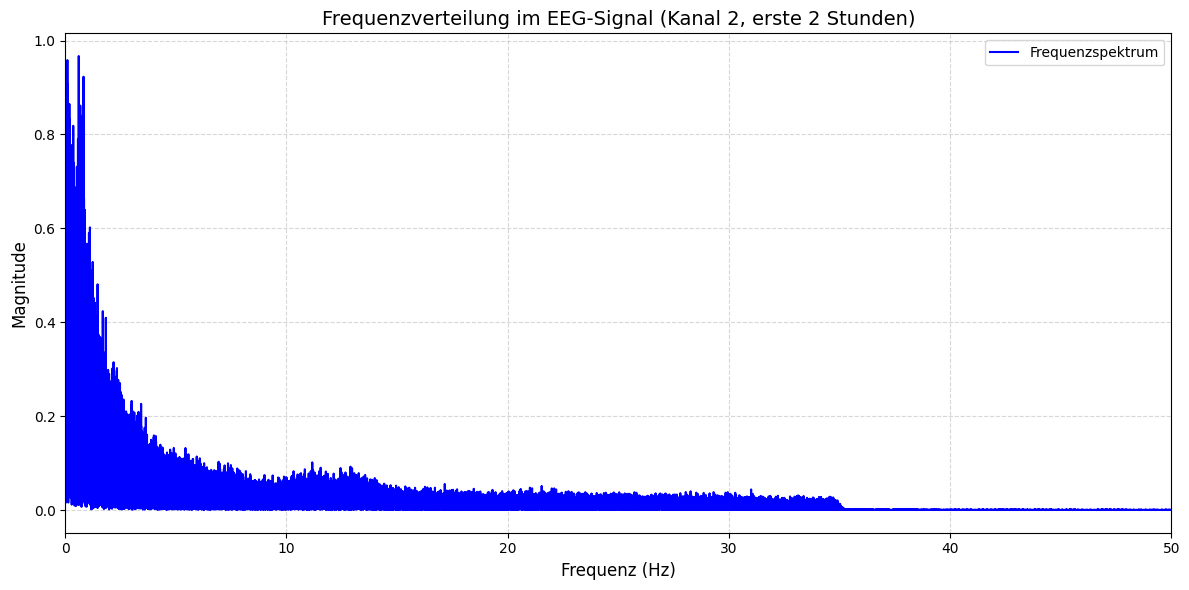

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling-Frequenz (256 Hz, wie angegeben)
sampling_rate = 256  # Hz

# Fourier-Transformation für die ersten zwei Stunden des Signals
fft_result = np.fft.fft(signal_data_2_hours)
frequencies = np.fft.fftfreq(len(signal_data_2_hours), 1 / sampling_rate)
magnitude = np.abs(fft_result)

# Nur positive Frequenzen extrahieren
positive_frequencies = frequencies[frequencies >= 0]
positive_magnitude = magnitude[frequencies >= 0]

# Plot des Frequenzspektrums
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, positive_magnitude, color="blue", label="Frequenzspektrum")
plt.title("Frequenzverteilung im EEG-Signal (Kanal 2, erste 2 Stunden)", fontsize=14)
plt.xlabel("Frequenz (Hz)", fontsize=12)
plt.ylabel("Magnitude", fontsize=12)
plt.grid(alpha=0.5, linestyle="--")
plt.xlim(0, 50)  # EEG-Frequenzen sind meist im Bereich von 0–50 Hz relevant
plt.legend()
plt.tight_layout()
plt.show()



## 3. Data Preparation

### 3.1 Artefakte raus filtern mit Butterworth-Bandpass-Filter

 Der Butterworth-Bandpass-Filter eliminiert die Linearen Trends.

 Frequenzen unter 0,5 Hz (niederfrequente Drifts) und über 50 Hz (hochfrequentes Rauschen) werden herausgefiltert.

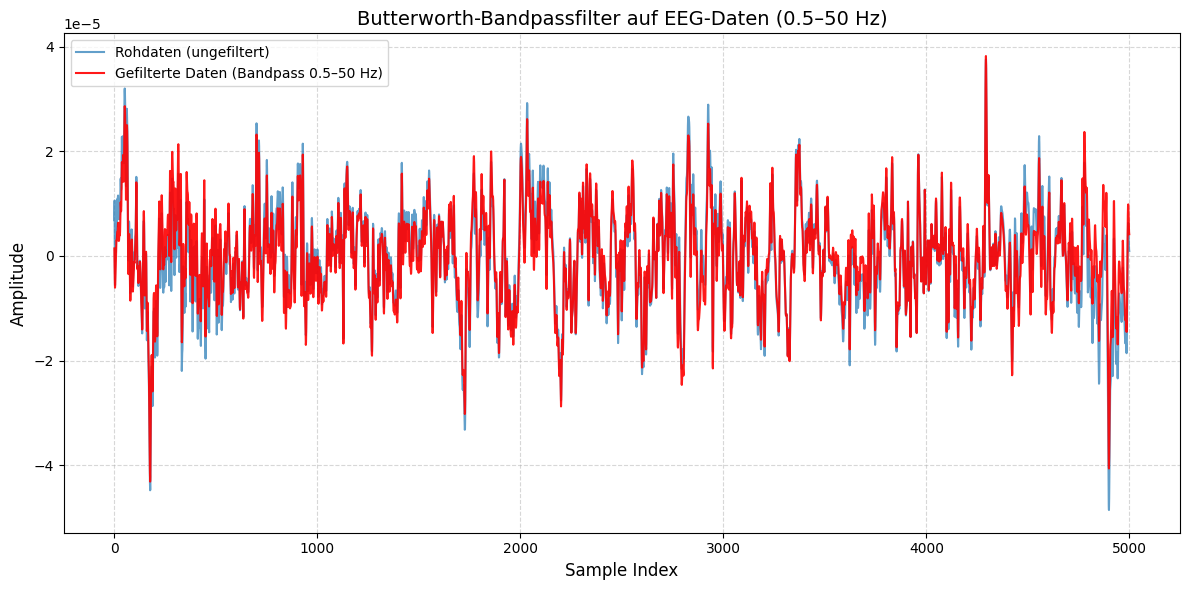

In [ ]:
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

# Butterworth-Bandpassfilter definieren
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # Nyquist-Frequenz
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')  # Bandpass-Filter
    return b, a

# Filterfunktion
def apply_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)  # Zero-Phase Filtering
    return y

# Parameter für den Bandpassfilter
lowcut = 0.5  # Untere Grenzfrequenz in Hz
highcut = 50.0  # Obere Grenzfrequenz in Hz
fs = 256  # Sampling-Frequenz in Hz (EEG-Daten)

# Anwendung des Filters auf die EEG-Daten (Signal: Kanal 2, erste 2 Stunden)
filtered_signal = apply_bandpass_filter(signal_data_2_hours, lowcut, highcut, fs, order=4)

# Rohdaten vs. Gefilterte Daten visualisieren
plt.figure(figsize=(12, 6))
plt.plot(signal_data_2_hours[:5000], label="Rohdaten (ungefiltert)", alpha=0.7)
plt.plot(filtered_signal[:5000], label="Gefilterte Daten (Bandpass 0.5–50 Hz)", alpha=0.9, color='red')
plt.title("Butterworth-Bandpassfilter auf EEG-Daten (0.5–50 Hz)", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.legend()
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()


### 3.2 EEG Daten in 30-Sekunden-Epochen segmentieren
Für die weitere Verarbeitung (Feature Extraktion, Feature Selection, Abgleich mit der Schlafphasen Datei) ist es notwendig, die EEG Daten in 30-Sekunden Epochen einzuteilen.

In [ ]:
import numpy as np
import pandas as pd

# Parameter
sampling_rate = 256  # Hz (Sampling-Frequenz)
epoch_duration = 30  # Dauer einer Epoche in Sekunden
samples_per_epoch = sampling_rate * epoch_duration  # Samples pro Epoche

# Funktion zur Segmentierung
def segment_eeg(signal, samples_per_epoch):
    """
    Segmentiere EEG-Signal in 30-Sekunden-Epochen.
    """
    num_epochs = len(signal) // samples_per_epoch  # Anzahl der Epochen
    epochs = np.array_split(signal[:num_epochs * samples_per_epoch], num_epochs)
    return epochs

# Signal segmentieren (Beispiel: gefilterte EEG-Daten)
epochs = segment_eeg(filtered_signal, samples_per_epoch)

# Daten für jede Epoche in DataFrame speichern
epoch_data = {
    f"Epoch_{i+1}": epoch for i, epoch in enumerate(epochs)
}

# Epochen in einen DataFrame umwandeln
df_epochs = pd.DataFrame(epoch_data)

# CSV-Speicherung (optional)
#df_epochs.to_csv("/content/drive/MyDrive/eeg_30_second_epochs.csv", index=False)
#print("30-Sekunden-Epochen wurden gespeichert.")

# Beispiel: Ausgabe der ersten Epoche
print(f"Erste Epoche (Länge: {len(epochs[0])} Samples):")
print(epochs[0])


Erste Epoche (Länge: 7680 Samples):
[ 1.42559646e-06 -1.72347853e-06 -4.59504338e-06 ...  4.01556127e-06
  4.06797829e-06  7.86868431e-06]


### 3.3 Feature Extraktion


#### 3.3.1 Symmlet-Walvelet Transformation
zeitlich aufgelöste Frequenzanalyse,
neue Features: die berechnete Energie der verschiedenen Frequenzbänder über die 30-Sekunden-Epochen
Es werden 8 Level benötigt, um die Frequenzbänder wie Delta komplett abzudecken.

In [ ]:
pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import pywt
from sklearn.preprocessing import StandardScaler

# Funktion zur Diskreten Wavelet-Transformation (DWT) mit Symmlet-Wavelets
def extract_dwt_features(epochs, wavelet_name="sym4", level=8):
    """
    Extrahiert Features aus 30-Sekunden-Epochen mithilfe der DWT mit Symmlet-Wavelets.
    """
    feature_data = []
    for i, epoch_signal in enumerate(epochs):
        # DWT anwenden
        coeffs = pywt.wavedec(epoch_signal, wavelet_name, level=level)

        # Berechnung der Energie für jedes Subband
        epoch_features = {"Epoch": i + 1}
        for j, coeff in enumerate(coeffs):
            epoch_features[f"Level_{j+1}_Energy"] = np.sum(np.square(coeff))

        feature_data.append(epoch_features)

    return pd.DataFrame(feature_data)

# Sampling-Frequenz
sampling_rate = 256  # Hz

# Feature-Extraktion für alle 30-Sekunden-Epochen mit Symmlet-Wavelets
features_dwt = extract_dwt_features(epochs, wavelet_name="sym4", level=8)

# Ausgabe der ersten Zeilen
# print("DWT Feature-Extraktion abgeschlossen:")
# print(features_dwt.head())

# Z-Score-Normalisierung
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features_dwt.iloc[:, 1:])
normalized_features_df = pd.DataFrame(normalized_features, columns=features_dwt.columns[1:])
normalized_features_df.insert(0, "Epoch", features_dwt["Epoch"])

# Normalisierte Features anzeigen
print("Normalisierte Features:")
print(normalized_features_df.head())

# Optional: Speichern der Features als CSV
# normalized_features_df.to_csv("/content/drive/MyDrive/eeg_dwt_sym4_features.csv", index=False)


Normalisierte Features:
   Epoch  Level_1_Energy  Level_2_Energy  Level_3_Energy  Level_4_Energy  \
0      1       -0.154606       -0.351145       -0.495583       -0.362173   
1      2       -0.142271       -0.369119       -0.478193       -0.372391   
2      3       -0.159491       -0.380065       -0.505219       -0.388422   
3      4       -0.086513        0.351830        0.073693        0.225672   
4      5       -0.138720       -0.152945       -0.211116       -0.123731   

   Level_5_Energy  Level_6_Energy  Level_7_Energy  Level_8_Energy  \
0       -0.413295       -0.713317       -0.092371       -0.057108   
1       -0.301423       -0.604390       -0.103250       -0.068272   
2       -0.347435       -0.522868       -0.140239       -0.154509   
3        0.487067        1.386012        0.880525        0.750674   
4        0.025686        0.048076        0.263227        0.142226   

   Level_9_Energy  
0       -0.044766  
1       -0.071659  
2       -0.170528  
3        0.699283  
4   

#### 3.3.2 Time Domain Features - statistische Parameters
neue Features: Mean, Standardabweichung, Skewness, Kurtosis, Median, Perzentil_25, Perzentil:75

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis

# Funktion zur Extraktion von Zeitbereichs-Features
def extract_time_domain_features(epochs):
    """
    Extrahiert Zeitbereichs-Features (Mean, StdDev, Skewness, Kurtosis, Median,
    Percentile_25, Percentile_75) für jede Epoche.
    """
    feature_data = []
    for i, epoch_signal in enumerate(epochs):
        # Berechnung der Features
        epoch_features = {
            "Mean": np.mean(epoch_signal),
            "StdDev": np.std(epoch_signal),
            "Skewness": skew(epoch_signal),
            "Kurtosis": kurtosis(epoch_signal),
            "Median": np.median(epoch_signal),
            "Percentile_25": np.percentile(epoch_signal, 25),
            "Percentile_75": np.percentile(epoch_signal, 75)
        }
        feature_data.append(epoch_features)

    return pd.DataFrame(feature_data)

# Zeitbereichs-Features berechnen
time_domain_features = extract_time_domain_features(epochs)

# Integrieren der neuen Features in das bestehende DataFrame
# Sicherstellen, dass die Zeilenanzahl übereinstimmt
if len(normalized_features_df) == len(time_domain_features):
    for column in time_domain_features.columns:
        normalized_features_df[column] = time_domain_features[column]
else:
    print("Fehler: Die Anzahl der Epochen stimmt nicht überein.")

# Ausgabe der aktualisierten Features
print("Aktualisiertes DataFrame mit Zeitbereichs-Features:")
print(normalized_features_df.head())

#Optional: Speichern der aktualisierten Features als CSV
#normalized_features_df.to_csv("/content/drive/MyDrive/eeg_combined_features.csv", index=False)


Aktualisiertes DataFrame mit Zeitbereichs-Features:
   Epoch  Level_1_Energy  Level_2_Energy  Level_3_Energy  Level_4_Energy  \
0      1       -0.154606       -0.351145       -0.495583       -0.362173   
1      2       -0.142271       -0.369119       -0.478193       -0.372391   
2      3       -0.159491       -0.380065       -0.505219       -0.388422   
3      4       -0.086513        0.351830        0.073693        0.225672   
4      5       -0.138720       -0.152945       -0.211116       -0.123731   

   Level_5_Energy  Level_6_Energy  Level_7_Energy  Level_8_Energy  \
0       -0.413295       -0.713317       -0.092371       -0.057108   
1       -0.301423       -0.604390       -0.103250       -0.068272   
2       -0.347435       -0.522868       -0.140239       -0.154509   
3        0.487067        1.386012        0.880525        0.750674   
4        0.025686        0.048076        0.263227        0.142226   

   Level_9_Energy          Mean    StdDev  Skewness  Kurtosis        Median 

#### 3.3.3 Hjorth-Parameter als Features hinzufügen
Diese Parameter liefern Informationen über die Mobilität und Komplexität der Zeitreihe und sind weit verbreitet in der EEG-Signalverarbeitung, um die Dynamik und die Muster eines Signals zu beschreiben.

- Aktivität (Activity):
Misst die Energie des Signals, entspricht der Varianz.
Gibt die Signalstärke bzw. Amplitude an.

- Mobilität (Mobility):
Beschreibt die Veränderungsrate des Signals.
Verhältnis zwischen der Standardabweichung der ersten Ableitung und der Standardabweichung des Signals.

- Komplexität (Complexity):
Misst, wie das Signal sich im Vergleich zu einer Sinuswelle verhält.
Verhältnis der Mobilität der zweiten Ableitung zur Mobilität der ersten Ableitung

In [ ]:
# Funktion zur Berechnung der Hjorth-Parameter
def hjorth_parameters(signal):
    """
    Berechnet Hjorth-Parameter: Aktivität, Mobilität und Komplexität.
    """
    # Erste und zweite Ableitung des Signals
    first_derivative = np.diff(signal)
    second_derivative = np.diff(first_derivative)

    # Hjorth-Aktivität (Varianz des Signals)
    activity = np.var(signal)

    # Hjorth-Mobilität
    mobility = np.sqrt(np.var(first_derivative) / activity)

    # Hjorth-Komplexität
    complexity = np.sqrt(np.var(second_derivative) / np.var(first_derivative)) / mobility

    return activity, mobility, complexity

# Hjorth-Parameter für alle Epochen berechnen
hjorth_features = []
for epoch_signal in epochs:
    activity, mobility, complexity = hjorth_parameters(epoch_signal)
    hjorth_features.append({
        "Activity": activity,
        "Mobility": mobility,
        "Complexity": complexity
    })

# Integrieren der Hjorth-Parameter in das bestehende DataFrame
hjorth_df = pd.DataFrame(hjorth_features)
normalized_features_df = pd.concat([normalized_features_df, hjorth_df], axis=1)

# Ausgabe der aktualisierten Features
print("Hjorth-Parameter hinzugefügt:")
print(normalized_features_df.head())

# Optional: Speichern des aktualisierten DataFrames
# normalized_features_df.to_pickle("/content/drive/MyDrive/eeg_features_with_hjorth.pkl")


Hjorth-Parameter hinzugefügt:
   Epoch  Level_1_Energy  Level_2_Energy  Level_3_Energy  Level_4_Energy  \
0      1       -0.154606       -0.351145       -0.495583       -0.362173   
1      2       -0.142271       -0.369119       -0.478193       -0.372391   
2      3       -0.159491       -0.380065       -0.505219       -0.388422   
3      4       -0.086513        0.351830        0.073693        0.225672   
4      5       -0.138720       -0.152945       -0.211116       -0.123731   

   Level_5_Energy  Level_6_Energy  Level_7_Energy  Level_8_Energy  \
0       -0.413295       -0.713317       -0.092371       -0.057108   
1       -0.301423       -0.604390       -0.103250       -0.068272   
2       -0.347435       -0.522868       -0.140239       -0.154509   
3        0.487067        1.386012        0.880525        0.750674   
4        0.025686        0.048076        0.263227        0.142226   

   Level_9_Energy          Mean    StdDev  Skewness  Kurtosis        Median  \
0       -0.044766  

In [ ]:
def calculate_wavelet_frequencies(levels, sampling_rate, wavelet_name):
    """
    Berechnet die Frequenzbänder der Wavelet-Levels basierend auf der Sampling-Frequenz.
    """
    wavelet = pywt.Wavelet(wavelet_name)
    center_frequency = 0.8125  # Center frequency für Symmlet (ungefähr)
    bands = []
    for level in range(1, levels + 1):
        low = sampling_rate / (2 ** (level + 1)) * center_frequency
        high = sampling_rate / (2 ** level) * center_frequency
        bands.append((low, high))
    return bands

# Frequenzbänder berechnen
wavelet_bands = calculate_wavelet_frequencies(9, sampling_rate, "sym4")
print("Wavelet-Levels und ihre Frequenzbänder:")
for i, band in enumerate(wavelet_bands):
    print(f"Level {i+1}: {band[0]:.2f} Hz - {band[1]:.2f} Hz")


Wavelet-Levels und ihre Frequenzbänder:
Level 1: 52.00 Hz - 104.00 Hz
Level 2: 26.00 Hz - 52.00 Hz
Level 3: 13.00 Hz - 26.00 Hz
Level 4: 6.50 Hz - 13.00 Hz
Level 5: 3.25 Hz - 6.50 Hz
Level 6: 1.62 Hz - 3.25 Hz
Level 7: 0.81 Hz - 1.62 Hz
Level 8: 0.41 Hz - 0.81 Hz
Level 9: 0.20 Hz - 0.41 Hz


#### 3.3.4 Band-Power-Features mit der Welch-Methode hinzufügen
Neue Features: die Frequenzbänder Delta (0.5–4 Hz), Theta (4–8 Hz), Alpha (8–13 Hz), Beta (13–30 Hz) und Gamma (30–50 Hz)

Vorgehensweise: Die welch-Methode berechnet die Power Spectral Density (PSD) für jede Epoche. Die Summation der PSD in einem Frequenzbereich gibt die Band-Power.


---

Frequenzbänder:

- Delta (0.5–4 Hz): Tiefschlaf.
- Theta (4–8 Hz): Leichte Schlafphasen.
- Alpha (8–13 Hz): Wachzustand mit geschlossenen Augen.
- Beta (13–30 Hz): Wachheit, mentale Aktivität.
- Gamma (30–50 Hz): Hochfrequente kognitive Prozesse


---

Band-Power-Features müssen normalisiert werden

In [ ]:
from scipy.signal import welch
from sklearn.preprocessing import StandardScaler

# Funktion zur Berechnung der Band-Power
def band_power(signal, sampling_rate, band):
    fmin, fmax = band
    freqs, psd = welch(signal, fs=sampling_rate, nperseg=1024)
    return np.sum(psd[(freqs >= fmin) & (freqs <= fmax)])

# Frequenzbänder definieren
frequency_bands = {
    "Delta": (0.5, 4),
    "Theta": (4, 8),
    "Alpha": (8, 13),
    "Beta": (13, 30),
    "Gamma": (30, 50)
}

# Band-Power-Features berechnen
band_power_features = []
for epoch_signal in epochs:
    features = {}
    for band_name, band_range in frequency_bands.items():
        features[f"{band_name}_Power"] = band_power(epoch_signal, sampling_rate, band_range)
    band_power_features.append(features)

# Band-Power-Features in DataFrame umwandeln
band_power_df = pd.DataFrame(band_power_features)

# Z-Score-Normalisierung der Band-Power-Features
scaler = StandardScaler()
band_power_df[band_power_df.columns] = scaler.fit_transform(band_power_df)

# Hinzufügen der normalisierten Band-Power-Features zum bestehenden DataFrame
final_features_df = pd.concat([normalized_features_df, band_power_df], axis=1)

# Ausgabe des aktualisierten DataFrames
print("Band-Power-Features hinzugefügt und normalisiert:")
print(final_features_df.head())



Band-Power-Features hinzugefügt und normalisiert:
   Epoch  Level_1_Energy  Level_2_Energy  Level_3_Energy  Level_4_Energy  \
0      1       -0.154606       -0.351145       -0.495583       -0.362173   
1      2       -0.142271       -0.369119       -0.478193       -0.372391   
2      3       -0.159491       -0.380065       -0.505219       -0.388422   
3      4       -0.086513        0.351830        0.073693        0.225672   
4      5       -0.138720       -0.152945       -0.211116       -0.123731   

   Level_5_Energy  Level_6_Energy  Level_7_Energy  Level_8_Energy  \
0       -0.413295       -0.713317       -0.092371       -0.057108   
1       -0.301423       -0.604390       -0.103250       -0.068272   
2       -0.347435       -0.522868       -0.140239       -0.154509   
3        0.487067        1.386012        0.880525        0.750674   
4        0.025686        0.048076        0.263227        0.142226   

   Level_9_Energy  ...  Percentile_25  Percentile_75      Activity  Mobility  

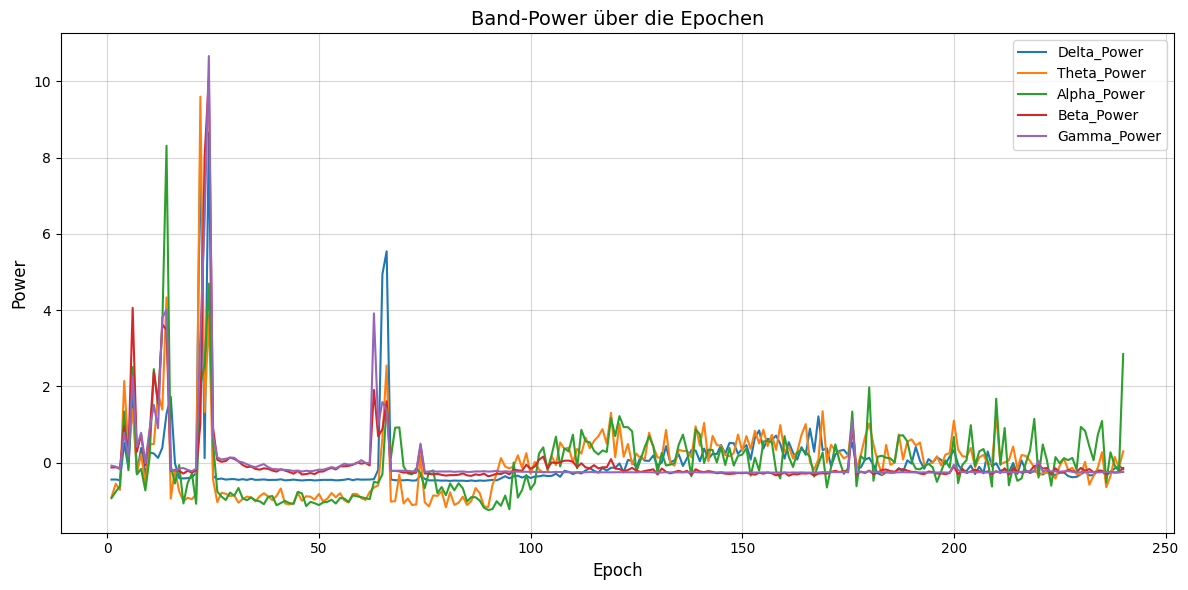

In [ ]:
import matplotlib.pyplot as plt

# Plot der Band-Power-Features
plt.figure(figsize=(12, 6))
for band in ["Delta_Power", "Theta_Power", "Alpha_Power", "Beta_Power", "Gamma_Power"]:
    plt.plot(final_features_df["Epoch"], final_features_df[band], label=band)

plt.title("Band-Power über die Epochen", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Power", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Dateiname für die Zwischenspeicherung
pickle_file_path = "/content/drive/MyDrive/eeg_combined_features.pkl"

# DataFrame als Pickle-Datei speichern
normalized_features_df.to_pickle(pickle_file_path)

print(f"DataFrame erfolgreich als Pickle-Datei gespeichert: {pickle_file_path}")


DataFrame erfolgreich als Pickle-Datei gespeichert: /content/drive/MyDrive/eeg_combined_features.pkl


In [ ]:
pip install aeon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
plotnine 0.14.1 requires pan